# Great Learning Project

# 1. Converting an Image to Grey Scale Image
- 

In [14]:
# import libraries
import cv2


In [6]:
# read the image AND convert BGR to Grey
image_convert= cv2.imread('D://M.SC STATISTICS//Certificate_courses//Great Learning//image recognization//convert image into grey scale//download.jpeg',
                          cv2.IMREAD_UNCHANGED
grey=cv2.cvtColor(image_convert, cv2.COLOR_BGR2GRAY)


thresh,im_black = cv2.threshold(grey,170,255, cv2.THRESH_BINARY)

# SHOW THE image
cv2.imshow('download.jpeg',im_black)
cv2.imwrite('grey.jpeg',grey)
cv2.imwrite('im_black.jpeg ', im_black)

# how many time image display
cv2.waitKey(0)

# destroy all windows
cv2.destroyAllWindows()


# 2. Converting an image to Six Different Forms 

GUI library - Graphical User Interface library

In [4]:
# import library
import cv2
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import * 


In [2]:
# install the easygui lirary
!pip install  easygui

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import easygui

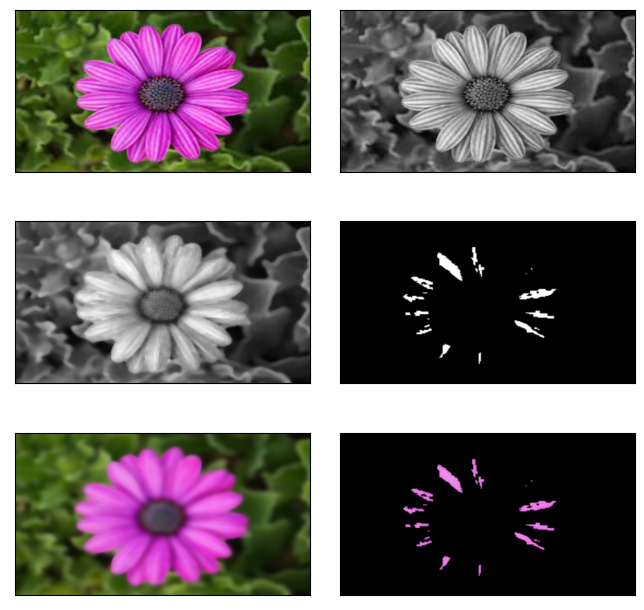

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Haha CORPORATION\AppData\Local\Temp\ipykernel_6064\979733513.py", line 10, in u
    c(Imagepath)
  File "C:\Users\Haha CORPORATION\AppData\Local\Temp\ipykernel_6064\979733513.py", line 14, in c
    originalimage = cv2.cvtColor(originalimage, cv2.COLOR_BGR2RGB)
cv2.error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [13]:
import tkinter as tk
from tkinter import Label, Button, messagebox
import easygui
import cv2
import matplotlib.pyplot as plt
import os

def u():
    Imagepath = easygui.fileopenbox()    # open the filebox
    c(Imagepath)

def c(Imagepath):                          # choose the file 
    originalimage = cv2.imread(Imagepath)
    originalimage = cv2.cvtColor(originalimage, cv2.COLOR_BGR2RGB)

    if originalimage is None:
        print("Can not find or load any image.")
        return
    
    # Real image
    R_1 = cv2.resize(originalimage, (930, 510))

    # real image converted into greyscale image
    greyScaleImage = cv2.cvtColor(originalimage, cv2.COLOR_BGR2GRAY)
    R_2 = cv2.resize(greyScaleImage, (930, 510))

    # greyscale image converted into smoothGrayScale image
    smoothGrayScale = cv2.medianBlur(greyScaleImage, 5)
    R_3 = cv2.resize(smoothGrayScale, (930, 510))

    # smoothGrayScale image converted into getedge image
    _, getedge = cv2.threshold(smoothGrayScale, 170, 255, cv2.THRESH_BINARY)
    R_4 = cv2.resize(getedge, (930, 510))

    # origincal image converted into color image
    colorImage = cv2.bilateralFilter(originalimage, 9, 300, 400)
    R_5 = cv2.resize(colorImage, (930, 510))

    # color image converted into cartoonimage 
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getedge)
    R_6 = cv2.resize(cartoonImage, (930, 510))

    images = [R_1, R_2, R_3, R_4, R_5, R_6]

    # subplot graph 
    fig, axes = plt.subplots(3, 2, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    # save button 
    savel = Button(root, text='Save Cartoon Image', command=lambda: save(R_6, Imagepath), padx=30, pady=5)
    savel.configure(background='red', foreground='yellow', font=('arial', 29, 'bold'))
    savel.pack(side=tk.TOP, pady=50)

    plt.show()

def save(ReSized6, Imagepath):
    newname = "Converted_Image"
    path1 = os.path.dirname(Imagepath)
    extension = os.path.splitext(Imagepath)[1]
    path = os.path.join(path1, newname + extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))

    I = "The saved image is named " + newname + " and saved at " + path
    messagebox.showinfo(title=None, message=I)

root = tk.Tk()
root.geometry('700x700')
root.title("Choose to convert ")   # title of root
root.configure(background='light green')

label = Label(root, background='black', font=('arial', 30, 'bold'))  # label design

a = Button(root, text="Convert Image", command=u, padx=15, pady=10)
a.configure(background="black", foreground="white", font=("arial", 30, "bold"))
a.pack(side=tk.TOP, pady=50)

root.mainloop()
